In [1]:
import numpy as np
import csv
import pickle
from math import floor, log10


In [2]:
dat_file = "../analysis/j1429/0_1d_spectra_29.36-3x3-4864-4914/z_2.1812/Spectrum_Analysis_z_2.1812_Measurement_Table.dat"
pickle_file = "../analysis/j1429/0_1d_spectra_29.36-3x3-4864-4914/z_2.1812/Spectrum_Analysis_z_2.1812.p"

In [3]:
ions = {}

with open(dat_file, newline='') as csvfile:
    datfilereader = csv.reader(csvfile, delimiter=' ', quotechar='"')
    for rownum,row in enumerate(datfilereader):
        if rownum == 0: continue
        # print(f"row[0]: {row[0]}")
        name = row[0]
        # print(f"name: {name}")
        ion = {
            "ew": row[1],
            "ew_sig": row[2],
            "vmin": row[3],
            "vmax": row[4],
            "N": row[5],
            "N_sig": row[6],
            "vel": row[7],
        }
        # print(f"rownum: {rownum}")
        # print(', '.join(row))
        # ions.append(ion)
        ions[name] = ion
        # print(f"ions[{name}]: {ions[name]}")
    # print(" -"*30)
# print(f"ions: {ions}")
for ion_name in ions:
    print(f"{ion_name}:")
    for meas in ions[ion_name]:
        print(f"    {meas}: {ions[ion_name][meas]}")


SiIII 1206:
    ew: 973.79
    ew_sig: 1888.3
    vmin: -226.47
    vmax: 292.65
    N: 13.9
    N_sig: 14.34
    vel: -12.38
NV 1238:
    ew: 751.5
    ew_sig: 3733.54
    vmin: -242.95
    vmax: 704.66
    N: 14.65
    N_sig: 15.35
    vel: 47.57
NV 1242:
    ew: 637.3
    ew_sig: 2683.16
    vmin: -275.91
    vmax: 350.33
    N: 15.0
    N_sig: 15.56
    vel: -52.21
SiII 1304:
    ew: 251.72
    ew_sig: 2517.25
    vmin: -121.25
    vmax: 212.08
    N: 14.32
    N_sig: 15.33
    vel: 16.71
CII 1334:
    ew: 748.05
    ew_sig: 2187.17
    vmin: -159.5
    vmax: 343.22
    N: 14.77
    N_sig: 15.25
    vel: 35.18
SiIV 1393:
    ew: 424.34
    ew_sig: 1892.79
    vmin: -197.75
    vmax: 173.83
    N: 13.76
    N_sig: 14.45
    vel: -3.37
SiIV 1402:
    ew: 172.69
    ew_sig: 2772.65
    vmin: -159.5
    vmax: 430.65
    N: 13.65
    N_sig: 14.83
    vel: 102.68
SiII 1526:
    ew: 702.63
    ew_sig: 2126.13
    vmin: -137.64
    vmax: 408.79
    N: 14.63
    N_sig: 15.11
    vel: 28.57


In [4]:
with open(pickle_file,'rb') as pklfile:  absys=pickle.load(pklfile)

# the keys are just the name of the absys "SiIII 1206"
keys = absys.keys()
# for key in keys:
#     print(f"key: {key}")
    
sample_key = list(keys)[0]
print(f"Absorber: {sample_key} --- ")

# the abs_keys are all of the measurements for that ion
abs_keys = absys[sample_key].keys()
for abs_key in sorted(abs_keys):
    print(f"   {abs_key} ::: {absys[sample_key][abs_key]}")
    # print(f"   {abs_key} ::: {np.shape(absys[sample_key][abs_key])}")
    


Absorber: SiIII 1206 --- 
   EW ::: 973.7936643673362
   EW_text ::: Text(0.05, 0.85, '974 $\\pm$ 1888 m$\\AA$')
   EWlims ::: [-226.4712767451656, 292.65415047520946]
   EWsig ::: 1888.304983357748
   N ::: 80350336540234.34
   Nsig ::: 221002261313299.28
   cont ::: [0.06777071 0.06657596 0.06539457 0.0642271  0.06307406 0.06193601
 0.06081347 0.05970698 0.05861709 0.05754432 0.05648921 0.0554523
 0.05443412 0.05343522 0.05245612 0.05149737 0.0505595  0.04964304
 0.04874854 0.04787653 0.04702754 0.04620212 0.0454008  0.04462411
 0.04387259 0.04314679 0.04244722 0.04177444 0.04112898 0.04051137
 0.03992215 0.03936186 0.03883103 0.0383302  0.03785991 0.03742069
 0.03701308 0.03663762 0.03629484 0.03598527 0.03570947 0.03546795
 0.03526126 0.03508993 0.03495451 0.03485552 0.03479351 0.034769
 0.03478255 0.03483467 0.03492592]
   error ::: [0.18891169 0.18323377 0.16906512 0.15204033 0.14355117 0.15567504
 0.16789864 0.1722099  0.16364075 0.17090176 0.16902372 0.16434471
 0.17016934 0.17

In [5]:
vel = absys[sample_key]['vel']
x_lim = absys[sample_key]['window_lim']
wave  = absys[sample_key]['wave']
ew_lims = absys[sample_key]['EWlims']
flux = absys[sample_key]['flux']
y_error = absys[sample_key]['error']
cont = absys[sample_key]['cont']
name = absys[sample_key]['name']

In [6]:
def sig_figs(x: float, precision: int = 6):
    """
    Rounds a number to number of significant figures
    Parameters:
    - x - the number to be rounded
    - precision (integer) - the number of significant figures
    Returns:
    - float
    """

    x = float(x)
    precision = int(precision)

    return round(x, -int(floor(log10(abs(x)))) + (precision - 1))

def show_lr(label, arr, lndx, rndx):
    print(f"{label} from: ({sig_figs(arr[lndx-1],6)}, {sig_figs(arr[lndx])})  to ({sig_figs(arr[rndx-1])}, {sig_figs(arr[rndx],6)})")

In [61]:
# now we want to calculate Gaussian fit to the absorption line

# the ewlim are defined in terms of the velocity
x1_index = np.where(vel >= ew_lims[0])[0][0]
x2_index = np.where(vel >= ew_lims[1])[0][0]

print(f"x1_index: {x1_index}      x2_index: {x2_index}")
print(f"ew_lims: {ew_lims}")
show_lr("vel", vel, x1_index, x2_index)
print("- "*20)
# calc percentage distance of ew_lims[0] between vel[x1_index-1] and vel[x1_index]
left_factor = (ew_lims[0]-vel[x1_index-1])/(vel[x1_index]-vel[x1_index-1])
print(f"{ew_lims[0]} is {sig_figs(left_factor, 4)} between {vel[x1_index-1]} and {vel[x1_index]}")
# print("ew_lims[0] is {:0} between {:1} and {:2}".format(left_factor:.5f, vel[x1_index-1], vel[x1_index]))
right_factor = (ew_lims[1]-vel[x2_index-1])/(vel[x2_index]-vel[x2_index-1])
print(f"{ew_lims[1]} is {sig_figs(right_factor, 4)} between {vel[x2_index-1]} and {vel[x2_index]}")

print("- "*20)
show_lr("wave", wave, x1_index, x2_index)
show_lr("flux", flux, x1_index, x2_index)
show_lr("cont", cont, x1_index, x2_index)



x1_index: 23      x2_index: 29
ew_lims: [-226.4712767451656, 292.65415047520946]
vel from: (-236.673, -158.543)  to (232.105, 310.234)
- - - - - - - - - - - - - - - - - - - - 
-226.4712767451656 is 0.1306 between -236.67267892549242 and -158.54312873867718
292.65415047520946 is 0.775 between 232.10463141013156 and 310.23418527869813
- - - - - - - - - - - - - - - - - - - - 
wave from: (3835.09, 3836.09)  to (3841.09, 3842.09)
flux from: (0.0416401, 0.0357488)  to (0.03477, 0.043992)
cont from: (0.0454008, 0.0446241)  to (0.041129, 0.0405114)


In [9]:
def gaussian(spec, ltype='Abs', initial_guesses=None):
    """  EW calculation using Gaussian fit

    Observer frame, not rest-frame. wvlim and spec must be set!

    Parameters
    ----------
    spec : Tuple of (wave, flux, sig)
    ltype : string
      whether this is for absorption or emission line (see SpectralLine Class)
    initial_guesses, optional : Tuple of (amplitude, mean, stddev) 
      Initial guesses of the Gaussian fit (unitless)

    Returns
    -------
    EW, sigEW : EW and error in observer frame
    
    """
    # Note: Tested in test_absline_anly

    # Grab
    wv,fx,sig = spec

    if ltype == 'Abs':
        fx = 1.-fx

    # dwv
    dwv = wv - np.roll(wv,1)
    dwv[0] = dwv[1]

    # Initial guesses of the Gaussian fit
    if initial_guesses is None:
        amp_init = np.mean(fx).value/2. #half the mean flux
        stddev_init = 3*np.mean(dwv).value #3 pixels
        mean_init = np.mean(wv).value #half wave range
    elif len(initial_guesses)==3:
        amp_init = initial_guesses[0]
        mean_init = initial_guesses[1] 
        stddev_init = initial_guesses[2]
        #check whether these values are sensible
        if (mean_init < np.min(wv.value)) or (mean_init > np.max(wv.value)):
             raise ValueError('gaussian_ew: The initial guess for Gaussian mean is not sensible; check it!')
        if (amp_init < 0):
             raise ValueError('gaussian_ew: The initial guess for Gaussian amplitude is not sensible; check it!')
        if (stddev_init < 0):
             raise ValueError('gaussian_ew: The initial guess for Gaussian stddev is not sensible; check it!')
    else:
        raise ValueError('gaussian_ew: Format of the initial_guesses is incorrect')

    # Model initialization
    g_init = models.Gaussian1D(amplitude=amp_init, mean=mean_init, stddev=stddev_init) # This model does not support units

    # Fitting algorithm initialization
    fit_g = fitting.LevMarLSQFitter()
    # Use only good values (i.e. with meaningful errors)
    cond = (sig > 0.) & (np.isfinite(sig))
    # Actual fit
    g = fit_g(g_init, wv[cond].value, fx[cond].value, weights=1./sig[cond].value)


    #Check whether the final fit is sensible
    fit_info = fit_g.fit_info
    if fit_info['param_cov'] is None:
        raise ValueError('gaussian_ew: The fit is not sensible! Check initial_guesses')

    # Area under curve of Gaussian is [amplitude*stddev*sqrt(2*pi)]
    EW = g.amplitude.value * g.stddev.value * np.sqrt(2 * np.pi) #unitless
    EW = EW * wv.unit #add the same unit as wv
    
    #error estimation
    cov = fit_g.fit_info['param_cov'] #covariance matrix
    x = g.parameters[0] # amplitude
    y = g.parameters[2] # stddev
    sigEW = EW * np.sqrt(cov[0,0] / x**2 + cov[2,2] / y**2 + 2 * cov[0,2] / (x*y))

    return EW, sigEW

In [70]:
def gaussian_fit_this_time_I_mean_it(wv, fx, sig, xlims):
    ''' this function assumes that the data is already normalized '''
    import numpy as np
    import matplotlib.pyplot as plt
    from astropy.modeling import models, fitting

    delwv  = np.double(xlims[1])-np.double(xlims[0])
    print(f"xlims = {xlims}")
    print(f"delwv = {delwv}")  
    amp_guess = np.max(fx)/2.
    mean_guess = np.mean(xlims)
    stddev_guess = 0.5*(delwv)
    print('amp_guess = ', amp_guess)
    print('mean_guess = ', mean_guess)
    print('stddev_guess = ', stddev_guess)
    # g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
    g_init = models.Gaussian1D(amplitude=amp_guess, mean=mean_guess, stddev=stddev_guess)
    fit_g = fitting.LevMarLSQFitter()
    # cond = (sig > 0.) & (np.isfinite(sig))
    # g = fit_g(g_init, wv[cond], fx[cond])
    g = fit_g(g_init, wv, fx)
    return g

wave_lims = [wave[x1_index-10],wave[x2_index+10]]
nflux = flux/cont
nerror = y_error/cont
gwagon = gaussian_fit_this_time_I_mean_it(wave, nflux, nerror, wave_lims)

xlims = [3836.088038449162, 3842.089598879232]
delwv = 6.001560430070185
amp_guess =  0.6270302444764596
mean_guess =  3839.088818664197
stddev_guess =  3.0007802150350926


Using velocity
xlims = [-226.4712767451656, 292.65415047520946]
delwv = 519.1254272203751
amp_guess =  -0.004989420066267807
mean_guess =  33.09143686502193
stddev_guess =  259.56271361018753
an_disp =  1.2540604889529192


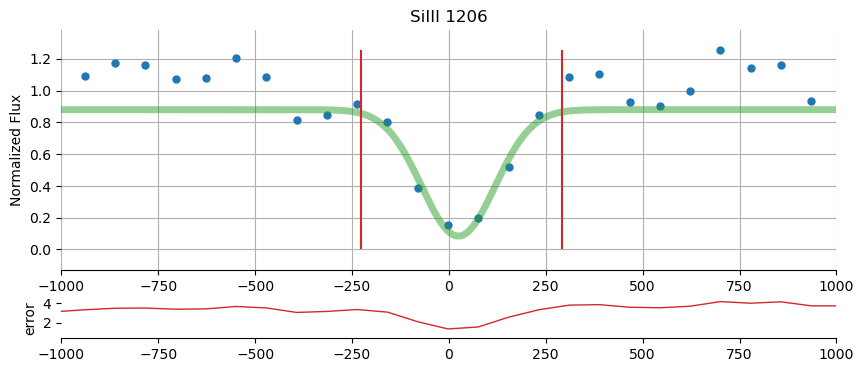

In [131]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def create_gaussian_fitter(wv, fx, sig, xlims):
    ''' this function assumes that the data is already normalized '''
    import numpy as np
    from astropy.modeling import models, fitting

    delwv  = np.double(xlims[1])-np.double(xlims[0])
    print(f"xlims = {xlims}")
    print(f"delwv = {delwv}")  
    # amp_guess = np.max(fx)/2.
    amp_guess = fx.min()
    # amp_guess=1.0
    mean_guess = np.mean(xlims)
    stddev_guess = 0.5*(delwv)
    an_disp = fx.max()
    # an_disp = 1.0
    print('amp_guess = ', amp_guess)
    print('mean_guess = ', mean_guess)
    print('stddev_guess = ', stddev_guess)
    print('an_disp = ', an_disp)
    g_init = (models.Const1D(an_disp) +
              models.Gaussian1D(amplitude=(amp_guess - an_disp), mean=mean_guess, stddev=stddev_guess))
    
    fit_g = fitting.LevMarLSQFitter()

    g = fit_g(g_init, wv, fx)
 
    return g

use_vel = True
if use_vel:
    print('Using velocity')
    adj = 0
    xdata = vel
    ewlims = [ew_lims[0]-adj, ew_lims[1]+adj]
    wlims = [-1000,1000]
else: 
    print('Using wavelength')
    xdata = wave
    ewlims = [wave[x1_index-1],wave[x2_index+1]]
    wlims = [wave[x1_index-20],wave[x2_index+20]]

nflux = flux/cont
nerror = y_error/cont
# gwagon = create_gaussian_fitter(wave, nflux, nerror, wave_lims)
gaussian_fit = create_gaussian_fitter(xdata, nflux, nerror, ewlims)

fig = plt.figure(figsize=(10, 4))
fakex = np.linspace(wlims[0], wlims[1], 1000)
gs = GridSpec(2, 1, height_ratios=[6, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax1.plot(xdata, nflux, 'o', color="tab:blue", label="flux", linewidth=1.0, markersize=5)
ax1.plot(fakex, gaussian_fit(fakex), 
         '-', 
         color="tab:green", 
         linewidth=5.0, alpha=0.5,
         markersize=5)
# ax1.plot(xdata, y_continuum, "-o", color="tab:gray", label="cont.", linewidth=1.0)
flux_max = np.max(np.abs(nflux))
flux_min = np.min(np.abs(nflux))

ax1.vlines(ewlims, flux_min, flux_max, color="tab:red") 

ax1.set_xlim(wlims)
ax1.set_xlabel('velocity (km/s)')
ax1.set_ylabel('Normalized Flux')
ax1.grid(True)
ax1.set_title(name)

ax1.spines[["left", "top", "right"]].set_visible(False)
ax1.margins(y=0.1)

ax2.plot(xdata, nerror, color="tab:red", label="flux", ms=4, linewidth=1.0, alpha=1)
ax2.spines[["left", "top", "right"]].set_visible(False)
ax2.set_ylabel('error')
ax2.margins(y=0.1)


[0.80541357 0.81569319 0.82478544 0.8326479  0.83924365 0.84454149
 0.84851628 0.85114907 0.85242728 0.85234479 0.85090199 0.84810579
 0.84396954 0.83851297 0.83176195 0.82374839 0.8145099  0.80408954
 0.79253549 0.77990066 0.76624228 0.75162151 0.73610292 0.7197541
 0.70264509 0.68484791 0.66643611 0.64748418 0.62806713 0.60825996
 0.5881372  0.56777247 0.54723803 0.52660439 0.5059399  0.48531046
 0.46477914 0.44440595 0.42424757 0.40435715 0.38478412 0.3655741
 0.34676875 0.32840574 0.31051873 0.29313732 0.27628715 0.25998992
 0.24426351 0.22912208 0.2145762 ]


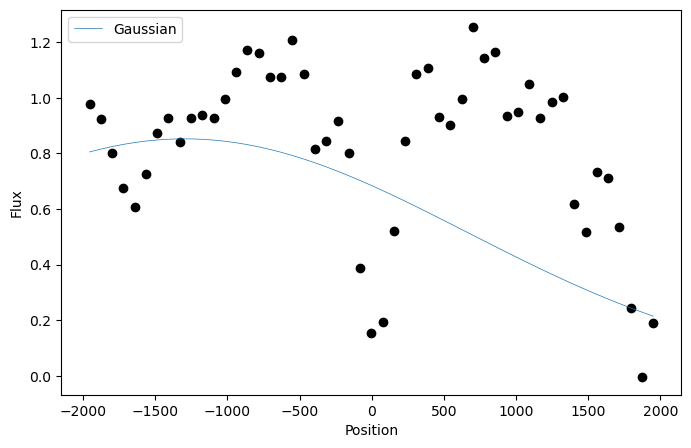

In [16]:
def guassian1D_fit_from_astropy(wv, fx, sig, xlims):
    ''' from https://docs.astropy.org/en/stable/modeling/fitting.html#simple-1-d-model-fitting '''
    import numpy as np
    import matplotlib.pyplot as plt
    from astropy.modeling import models, fitting

    # fx = 1.-fx

    dwv = wv - np.roll(wv,1)
    dwv[0] = dwv[1]    

    delwv  = np.double(xlims[1])-np.double(xlims[0])
    g_init = models.Gaussian1D(amplitude=np.mean(fx)/2., mean=np.mean(wv), stddev=0.5*(delwv))
    fit_g = fitting.LevMarLSQFitter()
    cond = (sig > 0.) & (np.isfinite(sig))
    g = fit_g(g_init, wv[cond], fx[cond], weights=1./sig[cond])


    # Plot the data with the best-fit model
    plt.figure(figsize=(8,5))
    plt.plot(wv[cond], fx[cond], 'ko') # plot the data
    plt.plot(wv[cond], g(wv[cond]), label='Gaussian', lw=0.5) # plot the fit
    print(g(wv[cond]))
    plt.xlabel('Position')
    plt.ylabel('Flux')
    plt.legend(loc=2)    
    plt.show()


nflux = flux / cont
nerror = y_error / cont
guassian1D_fit_from_astropy(vel, nflux, nerror, ew_lims)


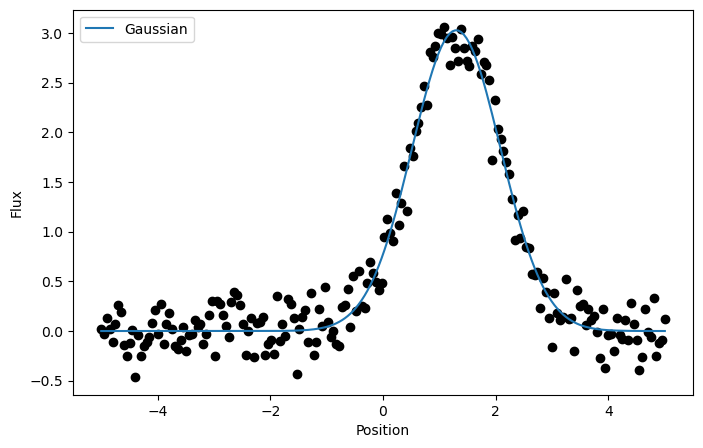

In [ ]:
# directly from astropy https://docs.astropy.org/en/stable/modeling/fitting.html#simple-1-d-model-fitting

import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Generate fake data
rng = np.random.default_rng(0)
x = np.linspace(-5., 5., 200)
flux = 3 * np.exp(-0.5 * (x - 1.3)**2 / 0.8**2)
flux += rng.normal(0., 0.2, x.shape)

# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, flux)

# Plot the data with the best-fit model
plt.figure(figsize=(8,5))
plt.plot(x, flux, 'ko')
plt.plot(x, g(x), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)
